In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 17 11:53:23 2020

@author: HP
"""
#import libs


from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout

#Initializing the CNN

classifier= Sequential()

#Layer 1 Conv
classifier.add(Convolution2D(32,(3,3),input_shape=(150,150,3),activation='relu'))

#Step 2 Pooling

classifier.add(MaxPooling2D(pool_size=(2,2)))

#layer 2

#Layer 1 Conv
classifier.add(Convolution2D(64 ,(3,3),activation='relu'))

#Step 2 Pooling

classifier.add(MaxPooling2D(pool_size=(2,2)))

#layer 3

#Layer 1 Conv
classifier.add(Convolution2D(128 ,(3,3),activation='relu'))

#Step 2 Pooling

classifier.add(MaxPooling2D(pool_size=(2,2)))


#Flattening

classifier.add(Flatten())

#Full-connection

classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(0.10))
classifier.add(Dense(units=6,activation='softmax'))

#Compiling the CNN

classifier.compile(optimizer='adam',loss='categorical_crossentropy',
                   metrics=['accuracy'])


from keras.preprocessing.image import ImageDataGenerator
#Fitting the CNN to images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.2,
        height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(150,150),
        batch_size=10,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        'test_set',
        target_size=(150,150),
        batch_size=10,
        class_mode='categorical')
history=classifier.fit(
        training_set,
        steps_per_epoch=14034,
        epochs=20,
        validation_data=test_set,
        validation_steps=3000,verbose=1)


classifier.save('intel_image_classifier.h5')


#Predicting on new set
import numpy as np
from keras.preprocessing import image

test_image= image.load_img('single_pred/23614.jpg',target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
training_set.class_indices


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/20
14034/14034 [==============================] - 984s 70ms/step - loss: 0.6419 - accuracy: 0.7639 - val_loss: 0.1981 - val_accuracy: 0.8587
Epoch 2/20
14034/14034 [==============================] - 832s 59ms/step - loss: 0.4530 - accuracy: 0.8394 - val_loss: 0.7514 - val_accuracy: 0.8583
Epoch 3/20
14034/14034 [==============================] - 841s 60ms/step - loss: 0.4064 - accuracy: 0.8558 - val_loss: 0.3350 - val_accuracy: 0.8483
Epoch 4/20
14034/14034 [==============================] - 880s 63ms/step - loss: 0.3779 - accuracy: 0.8649 - val_loss: 0.3362 - val_accuracy: 0.8673
Epoch 5/20
14034/14034 [==============================] - 859s 61ms/step - loss: 0.3684 - accuracy: 0.8690 - val_loss: 0.5906 - val_accuracy: 0.8600
Epoch 6/20
14034/14034 [==============================] - 846s 60ms/step - loss: 0.3588 - accuracy: 0.8732 - val_loss: 0.1589 - val_accuracy: 0.8740
Epoch 7/20
14034/1403

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

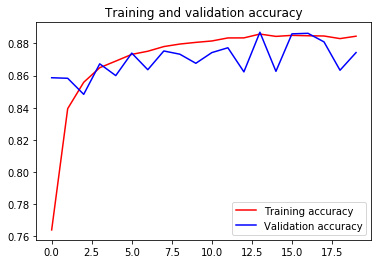

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [5]:
result

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [94]:
test_image= image.load_img('single_pred/605.jpg',target_size=(150,150))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict_classes(test_image)
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [95]:
result #building

array([0], dtype=int64)